In [4]:
import pandas as pd
import numpy as np
import pandas as pd
from collections import deque
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.distributions import Categorical
import gymnasium as gym
df = pd.read_csv("a2c_scores.csv")

# Obliczanie średniej z ostatnich 100 wierszy, zaczynając od wiersza 101
df['average_last_100'] = df['policy_scores'].rolling(window=100, min_periods=1).mean()


In [11]:
df

,policy_scores,average_last_100
0,-96.289848,-96.289848
1,-132.367866,-114.328857
2,-102.945360,-110.534358
3,-247.628402,-144.807869
4,-184.016373,-152.649570
...,...,...
3902,262.960419,226.543584
3903,246.772925,229.099453
3904,302.546488,229.811578
3905,224.393332,229.673376


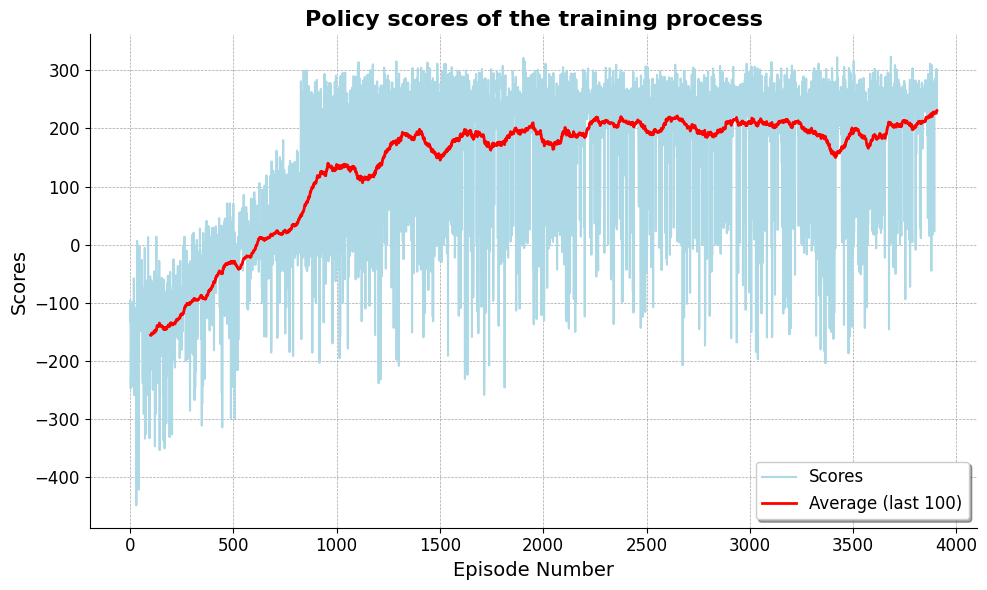

In [10]:
a2cscores = pd.read_csv("a2c_scores.csv")

# Assuming the column of interest is named "policy_scores"
scores = a2cscores["policy_scores"]
fig, ax = plt.subplots(figsize=(10, 6))

scores.plot(ax=ax, label="Scores", color='lightblue', linewidth=1.5)
(scores.rolling(window=100)
           .mean()
           .rename("Average (last 100)")
           .plot(ax=ax, color='red', linewidth=2, linestyle='-'))

ax.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
ax.set_title("Policy scores of the training process", fontsize=16, fontweight='bold')
ax.set_xlabel("Episode Number", fontsize=14)
ax.set_ylabel("Scores", fontsize=14)

ax.tick_params(axis='both', which='major', labelsize=12)
ax.legend(fontsize=12, loc='lower right', frameon=True, shadow=True, fancybox=True)

# del?


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()
plt.show()

In [12]:
df2 = pd.read_csv("training_scores3.csv")

In [17]:
df2

,episode,score,avg_score,average_last_100
0,1,-17.271219,NaN,-17.271219
1,2,-133.161239,NaN,-75.216229
2,3,-87.424321,NaN,-79.285593
3,4,-150.222698,NaN,-97.019869
4,5,-122.120612,NaN,-102.040018
...,...,...,...,...
2351,2352,286.944159,226.594768,226.594768
2352,2353,245.160390,226.807901,226.807901
2353,2354,276.780563,229.430931,229.430931
2354,2355,262.201469,229.754511,229.754511


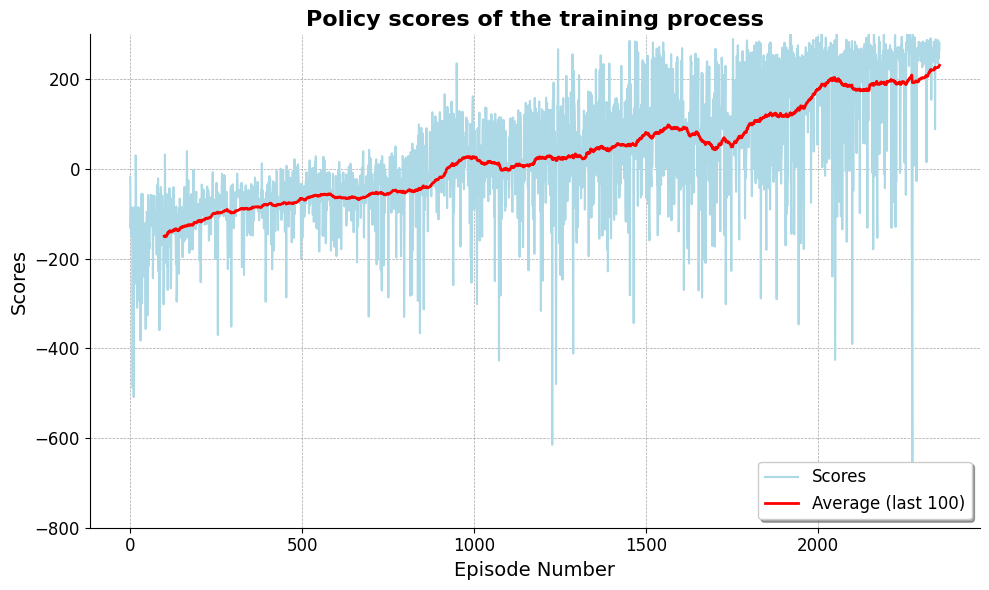

In [22]:
a2cscores = pd.read_csv("a2c_scores.csv")

# Assuming the column of interest is named "policy_scores"
scores = df2["score"]
fig, ax = plt.subplots(figsize=(10, 6))

scores.plot(ax=ax, label="Scores", color='lightblue', linewidth=1.5)
(scores.rolling(window=100)
           .mean()
           .rename("Average (last 100)")
           .plot(ax=ax, color='red', linewidth=2, linestyle='-'))

# Set y-axis range
ax.set_ylim(-800, 300)

# Customizing the plot
ax.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
ax.set_title("Policy scores of the training process", fontsize=16, fontweight='bold')
ax.set_xlabel("Episode Number", fontsize=14)
ax.set_ylabel("Scores", fontsize=14)

ax.tick_params(axis='both', which='major', labelsize=12)
ax.legend(fontsize=12, loc='lower right', frameon=True, shadow=True, fancybox=True)

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

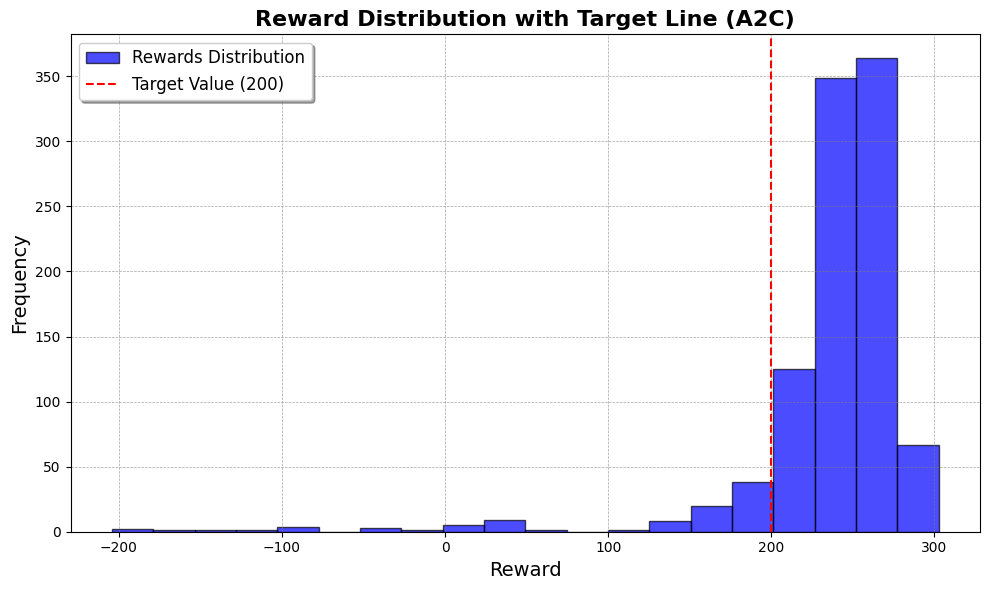

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

a2c_scores = pd.read_csv("test_scores_a2c.csv")

rewards = a2c_scores["reward"]

fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(rewards, bins=20, color='blue', alpha=0.7, edgecolor='black', label="Rewards Distribution")

ax.axvline(x=200, color='red', linestyle='--', linewidth=1.5, label="Target Value (200)")

ax.set_title("Reward Distribution with Target Line (A2C)", fontsize=16, fontweight='bold')
ax.set_xlabel("Reward", fontsize=14)
ax.set_ylabel("Frequency", fontsize=14)
ax.legend(fontsize=12, loc='best', frameon=True, shadow=True, fancybox=True)
ax.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

plt.tight_layout()
plt.show()


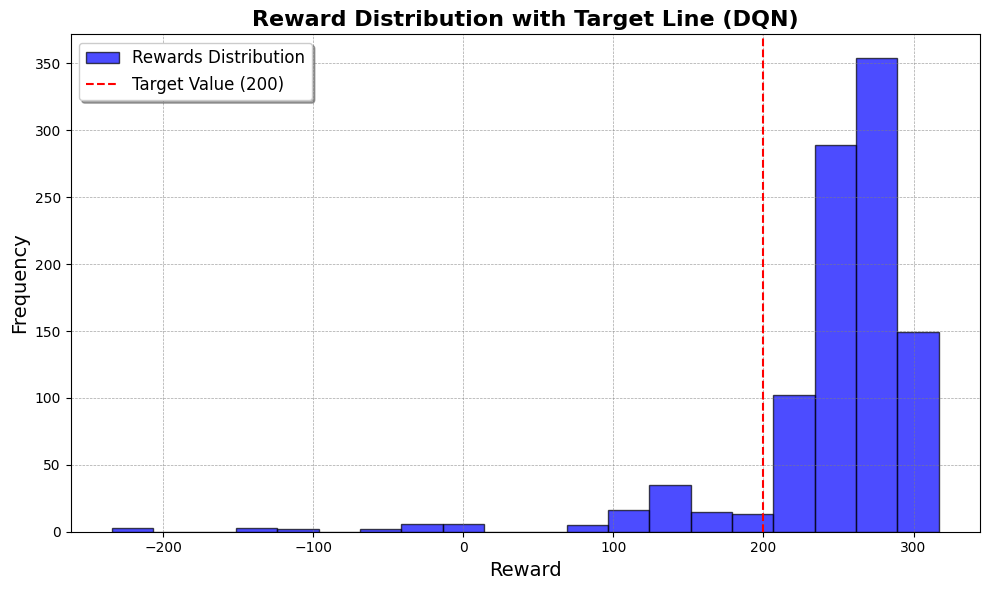

In [28]:
import pandas as pd
import matplotlib.pyplot as plt


a2c_scores = pd.read_csv("test_scores_dqn.csv")

rewards = a2c_scores["reward"]

fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(rewards, bins=20, color='blue', alpha=0.7, edgecolor='black', label="Rewards Distribution")

ax.axvline(x=200, color='red', linestyle='--', linewidth=1.5, label="Target Value (200)")

ax.set_title("Reward Distribution with Target Line (DQN)", fontsize=16, fontweight='bold')
ax.set_xlabel("Reward", fontsize=14)
ax.set_ylabel("Frequency", fontsize=14)
ax.legend(fontsize=12, loc='best', frameon=True, shadow=True, fancybox=True)
ax.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

plt.tight_layout()
plt.show()


In [31]:
import pandas as pd

a2c_scores = pd.read_csv("test_scores_a2c.csv")
dqn_scores = pd.read_csv("test_scores_dqn.csv")

a2c_rewards = a2c_scores["reward"]
dqn_rewards = dqn_scores["reward"]


def calculate_statistics(rewards, name):
    stats = {
        "Algorithm": name,
        "Mean": rewards.mean(),
        "Max": rewards.max(),
        "Min": rewards.min(),
        "Std Dev": rewards.std(),
        "Above 200 (%)": (rewards[rewards > 200].count() / len(rewards)) * 100,
        "Median": rewards.median(),
        "25th Percentile": rewards.quantile(0.25),
        "75th Percentile": rewards.quantile(0.75)
    }
    return stats

a2c_stats = calculate_statistics(a2c_rewards, "A2C")
dqn_stats = calculate_statistics(dqn_rewards, "DQN")

comparison_df = pd.DataFrame([a2c_stats, dqn_stats])

comparison_df


,Algorithm,Mean,Max,Min,Std Dev,Above 200 (%),Median,25th Percentile,75th Percentile
0,A2C,236.772042,302.644825,-204.197617,54.598871,90.7,248.264245,230.045712,261.455411
1,DQN,247.187798,316.737916,-234.056972,63.969266,89.8,261.789526,240.201667,279.718587


In [34]:
import pandas as pd

a2c_scores = pd.read_csv("test_scores_a2c.csv")
dqn_scores = pd.read_csv("test_scores_dqn.csv")

a2c_rewards = a2c_scores["steps"]
dqn_rewards = dqn_scores["steps"]


def calculate_statistics(rewards, name):
    stats = {
        "Algorithm": name,
        "Mean": rewards.mean(),
        "Max": rewards.max(),
        "Min": rewards.min(),
        "Std Dev": rewards.std(),
        "Median": rewards.median(),
        "25th Percentile": rewards.quantile(0.25),
        "75th Percentile": rewards.quantile(0.75)
    }
    return stats

a2c_stats = calculate_statistics(a2c_rewards, "A2C")
dqn_stats = calculate_statistics(dqn_rewards, "DQN")

comparison_df = pd.DataFrame([dqn_stats, a2c_stats])

comparison_df


,Algorithm,Mean,Max,Min,Std Dev,Median,25th Percentile,75th Percentile
0,DQN,305.108,1000,82,194.670925,246.0,230.0,268.0
1,A2C,346.963,890,232,96.875025,312.0,290.0,359.0
